In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir,'..')))

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scripts.data_load import load_data
from scripts.data_visualization import *

In [3]:
data = load_data('../data/MachineLearningRating_v3.txt')

c:\Users\USER\Documents\10X Exercises\Week-3_AlphaCare_Insurance_Solutions\scripts\data_load.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path, sep="|")


In [17]:
missing_values = data.isnull().sum()
print(missing_values)

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 53 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  object        
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

In [16]:
data['TotalPremium'].describe()

count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: TotalPremium, dtype: float64

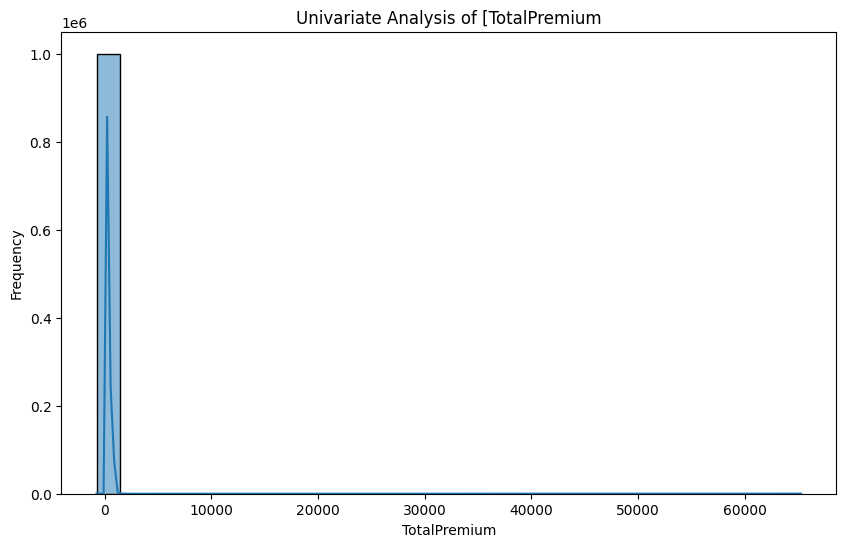

In [18]:
plot_univariate(data, 'TotalPremium')

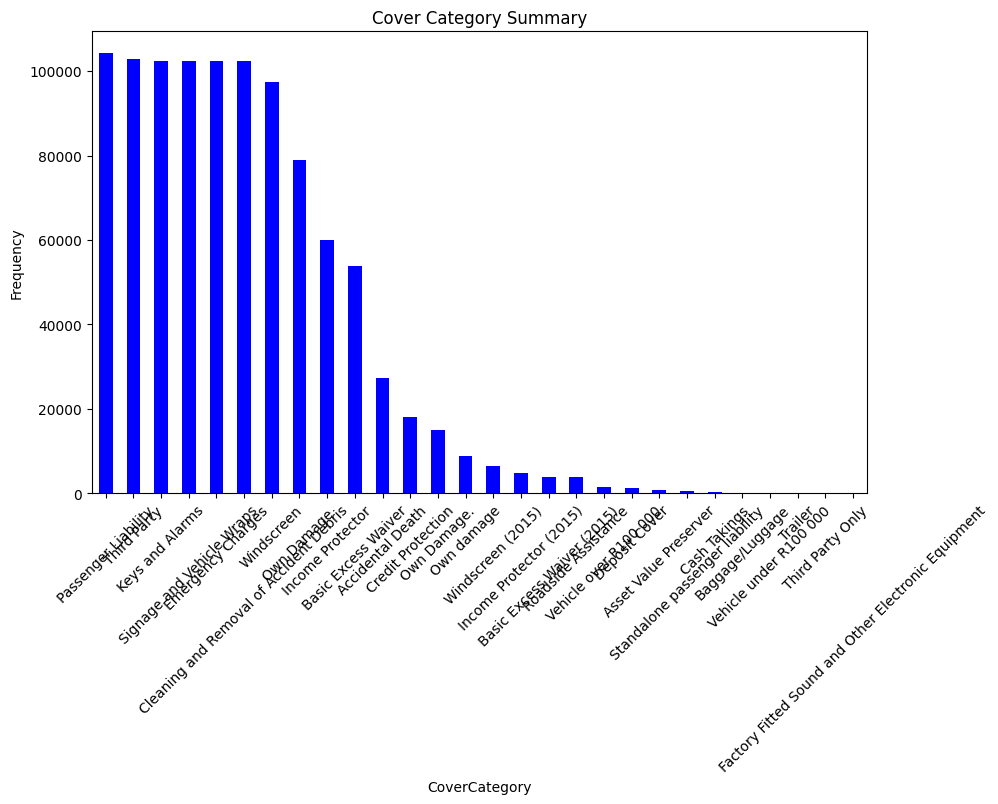

In [19]:
cover_category = data['CoverCategory'].value_counts()
plot_visual(cover_category, 'CoverCategory', 'Frequency','Cover Category Summary', 'bar', 'blue')

In [20]:
data['Date'] = pd.to_datetime(data['TransactionMonth'])

In [21]:
df = data.sort_values(by=['PostalCode', 'Date'])

In [22]:
df['TotalPremium_Change'] = df.groupby('PostalCode')['TotalPremium'].pct_change()
df['TotalClaims_Change'] = df.groupby('PostalCode')['TotalClaims'].pct_change()

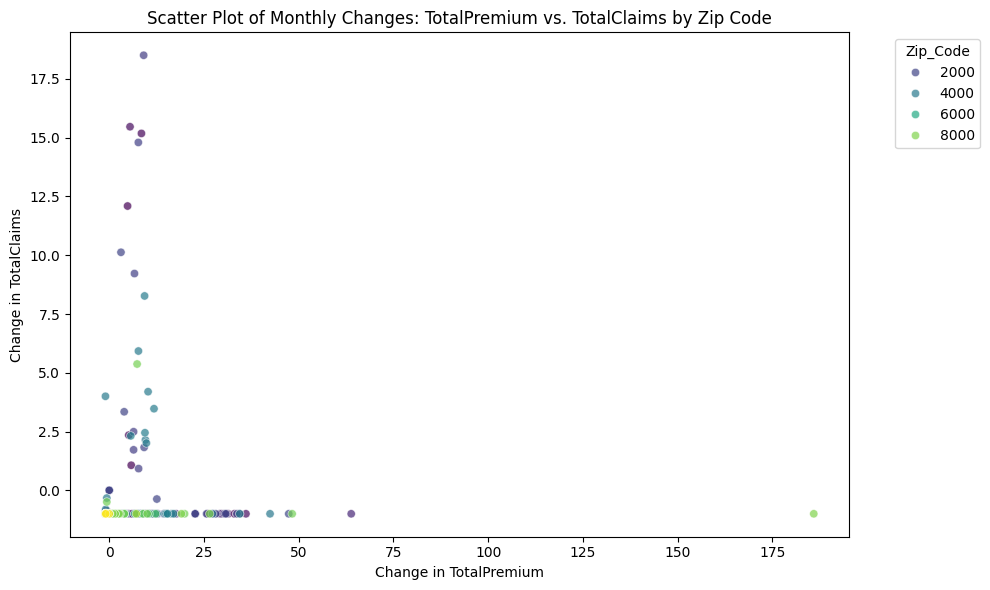

In [23]:
# Ensure the columns 'TotalPremium_Change' and 'TotalClaims_Change' exist
if 'TotalPremium_Change' not in df.columns or 'TotalClaims_Change' not in df.columns:
	df['TotalPremium_Change'] = df.groupby('PostalCode')['TotalPremium'].diff()
	df['TotalClaims_Change'] = df.groupby('PostalCode')['TotalClaims'].diff()
	df = df.dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium_Change', y='TotalClaims_Change', hue='PostalCode', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Monthly Changes: TotalPremium vs. TotalClaims by Zip Code')
plt.xlabel('Change in TotalPremium')
plt.ylabel('Change in TotalClaims')
plt.legend(title='Zip_Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

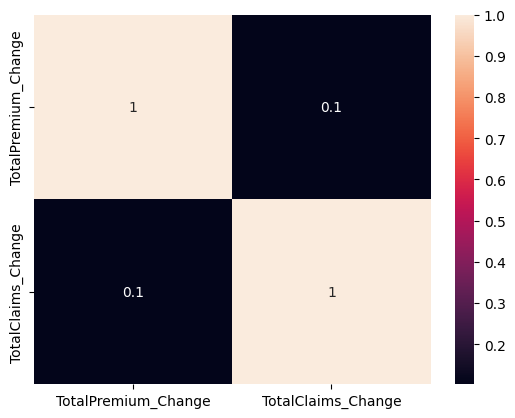

In [8]:
corr_data = df[['TotalPremium_Change', 'TotalClaims_Change']].corr()

sns.heatmap(corr_data, annot=True)
plt.show()

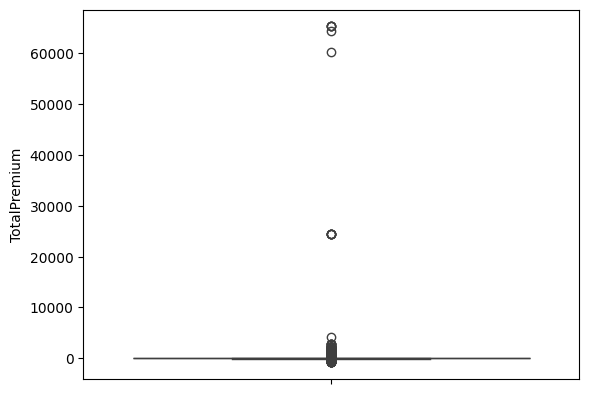

In [9]:
sns.boxplot(data=data, y='TotalPremium')
plt.show()